In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

In [5]:
from dynascale.challenges.ca import CAChallenge
from dynascale.utils.ca import plot
import cellpylib as cpl
from dynascale.baselines.conv import Conv

  0%|          | 0/1000 [00:00<?, ?it/s]

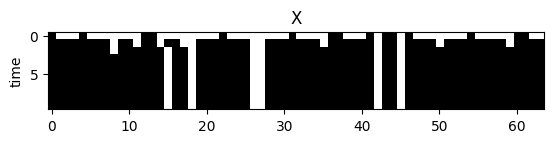

In [12]:
latent_dim = 3
embed_dim = 64
timesteps = 10
n = 1000
challenge = CAChallenge(latent_dim, embed_dim, mutation_p=0)
x0 = challenge.make_init_conds(n=n)
x = challenge.make_data(x0, timesteps=timesteps)
plot([x], labels=["X"])